# Food Recognition
**Capstone Project-2 Proposal | Image Recognition**  
**Project Title:** Food Recognition for Nutrition Tracking  
**Possible Usage:** Diet tracking, calorie estimation, and meal recommendations.  

1. **Pizza**  
2. **Burger**  
3. **Salad**  
4. **Sushi**  
5. **Ice Cream**  
6. **Pasta**  
7. **Soup**  
8. **Steak**  
9. **Sandwich**  
10. **Fries**  
11. **Donut**  
12. **Pancakes**  
13. **Rice Dish**  
14. **Taco**  
15. **Fried Chicken**  
16. **Hot Dog**  
17. **Noodles**  
18. **Curry**  
19. **Dumplings**  
20. **BBQ Ribs**  
21. **Cheesecake**  
22. **Waffles**  
23. **Smoothie**  
24. **Stew**  
25. **Omelette**  


# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Work/Food_recognition

/content/drive/My Drive/Work/Food_recognition


In [ ]:
# !zip -r '/content/drive/My Drive/MasterCourse/Cap Recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourse/Cap Recognizer/data'

  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/ (stored 0%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/ (stored 0%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/6f3adc1a-be8b-4c1d-82aa-fe8ee9546317.jpg (deflated 2%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/9706bc15-a249-4553-9a9e-229a115d0047.jpg (deflated 2%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/22d28339-f839-43db-8bee-a39cafea3290.jpg (deflated 1%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/844f66a0-6362-4997-819a-50acd0b2a60a.png (deflated 25%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/8940d0d8-c0d8-444a-bd86-778957abaffe.png (deflated 14%)
  adding: content/drive/My Drive/MasterCourse/Cap Recognizer/data/baseball cap/1d4b8761-346e-4140-9ef8-90c532c7b88a.jpg (deflated 1%)
  adding: content/drive

# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [ ]:
doc(search_images_ddg)

In [6]:
food_labels = [
    "pizza",
    "burger",
    "salad",
    "sushi",
    "ice cream",
    "pasta",
    "soup",
    "steak",
    "sandwich",
    "fries",
    "donut",
    "pancakes",
    "rice dish",
    "taco",
    "fried chicken",
    "hot dog",
    "noodles",
    "curry",
    "dumplings",
    "bbq ribs",
    "cheesecake",
    "waffles",
    "smoothie",
    "stew",
    "omelette"
]
len(food_labels)

25

In [12]:
images = search_images_ddg(food_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[1]}"

'No of Images => 200 -- One Image URL => https://www.pizzapizza.cl/wp-content/uploads/2021/01/SUPER_TEJANA_WEB-scaled.jpg'

In [13]:
doc(download_url)

In [14]:
dest = "pizza.jpg"
download_url(images[1], dest, show_progress=False)

Path('pizza.jpg')

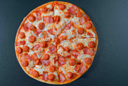

In [15]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [16]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for food_type in food_labels:

  dest = f"{data_path}/{food_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    food_image_urls = search_images_ddg(food_type)
    download_images(dest, urls = food_image_urls)

  except:
    continue

In [17]:
image_counts = get_image_files(data_path)
image_counts

(#4664) [Path('data/pizza/d5204210-801f-4472-aa0e-19501f0add06.jpg'),Path('data/pizza/01b14a71-aa85-439d-8ccd-6f943cfa961e.jpg'),Path('data/pizza/3741875f-a06d-49bb-82d3-96e34e7df5ca.jpg'),Path('data/pizza/3e3d39de-ddd3-4cea-b869-807e2a8f545c.jpg'),Path('data/pizza/9fd88862-c2a9-4ca7-914b-b6651b27a285.jpg'),Path('data/pizza/836e0a0c-daf9-4200-8254-c9d1af620854.jpg'),Path('data/pizza/fbbc7275-364f-4846-9f5f-85dac341c270.png'),Path('data/pizza/22ebae02-b873-45cf-827d-56eb189031a4.jpeg'),Path('data/pizza/071c5e99-b9fb-45fa-a150-239ee4f91570.jpg'),Path('data/pizza/da4c0861-4a01-46d6-a88a-9fe95485593d.jpg'),Path('data/pizza/d5139243-5814-45b6-9648-6895e525c460.jpg'),Path('data/pizza/79027dec-adc8-498b-91d4-553d61e3ae73.jpg'),Path('data/pizza/759c6902-dbc4-4e13-b2f1-d3a501b98b65.jpg'),Path('data/pizza/bbf0ed4c-552d-46ae-b6c1-56f29f0c1af6.jpg'),Path('data/pizza/8c3a80f0-6293-4cee-a08e-e09049afc892.jpg'),Path('data/pizza/c519a674-1b05-40a2-8069-d2b62a40c2a7.jpg'),Path('data/pizza/d3e0c5b6-7d91

In [18]:
failed = verify_images(image_counts)
failed

(#108) [Path('data/pizza/79a31101-a574-4651-8fa8-9db5bcf762f7.png'),Path('data/pizza/d4508394-8525-4db7-a742-e10e5de029c9.jpeg'),Path('data/pizza/5496fb15-34ab-48af-8659-d3081e8bbbac.jpeg'),Path('data/pizza/586e6edb-0864-4645-a769-d4c82016f1ef.jpg'),Path('data/pizza/d3bdbc0d-c71d-4d77-967c-7398b647c72a.jpg'),Path('data/pizza/ae178f86-c718-4d2f-b8a7-48dd46d623df.jpg'),Path('data/pizza/7b808630-34c3-45c4-a3a9-8be48036460a.jpg'),Path('data/pizza/734a42b5-5a7c-42fa-8ef7-a11e8f7245ac.jpg'),Path('data/burger/1a2e7029-447f-4f00-aec6-bd8332320738.jpg'),Path('data/burger/06b8e2fc-875a-4721-a8b6-264c5ea2ffc9.jpg'),Path('data/burger/80512d54-7306-4a55-8254-c948707e997a.jpg'),Path('data/burger/2e97f038-4625-42cc-82e0-4e534f793747.jpg'),Path('data/burger/5005594e-3142-4411-bae8-7c4c2efa2687.jpg'),Path('data/burger/94d813ab-a3f4-4bee-b5f4-0def0ea99760.jpg'),Path('data/burger/5fc1eeba-8ca6-4b1f-bf9d-48d3bd941aeb.jpg'),Path('data/salad/d4ba0305-4165-4f39-b065-f41f91c20419.jpg'),Path('data/sushi/7a78f3

In [19]:
failed.map(Path.unlink)

(#108) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [20]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [21]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

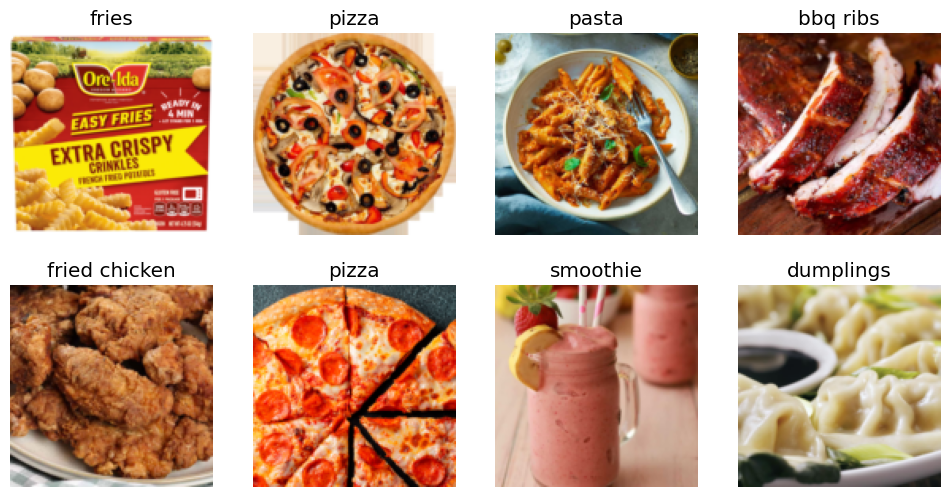

In [22]:
dls.train.show_batch(max_n=8, nrows=2)

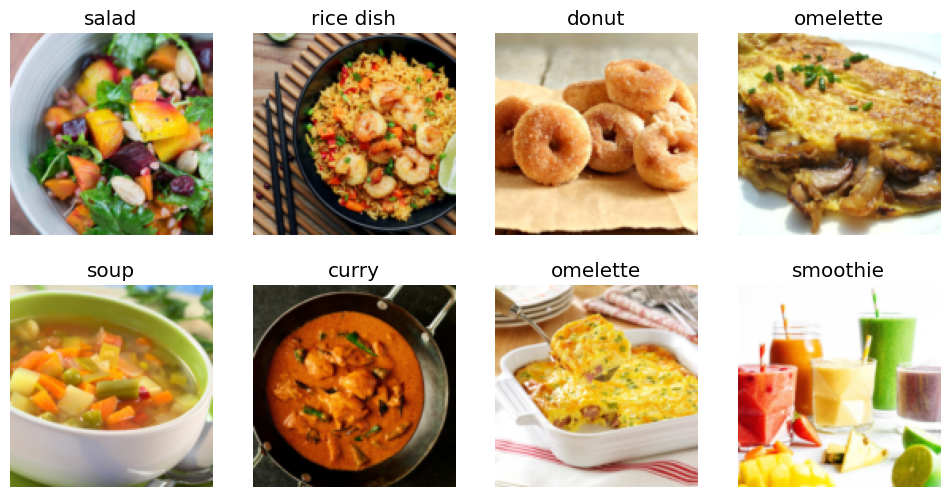

In [23]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

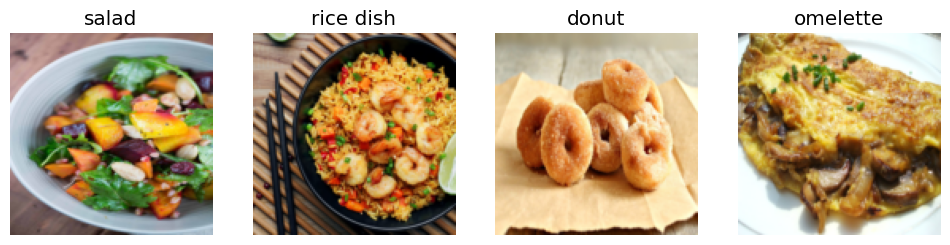

In [24]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

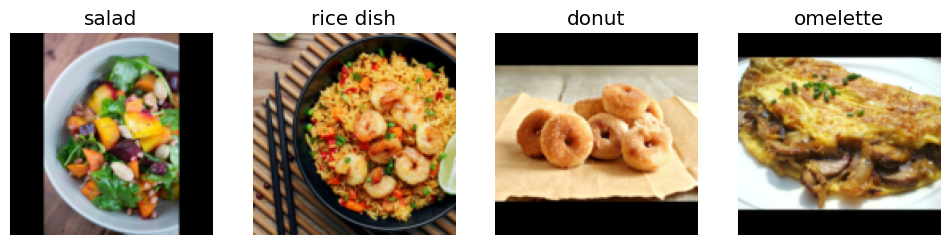

In [25]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

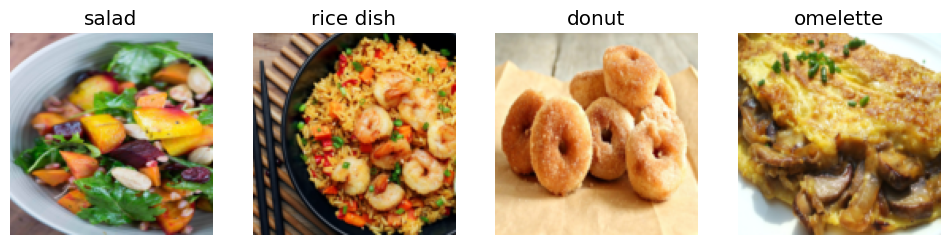

In [26]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [27]:
doc(aug_transforms)

,Type,Default,Details,
mult,float,1.0,"Multiplication applying to `max_rotate`,`max_lighting`,`max_warp`",
do_flip,bool,True,Random flipping,
flip_vert,bool,False,Flip vertically,
max_rotate,float,10.0,Maximum degree of rotation,
min_zoom,float,1.0,Minimum zoom,
max_zoom,float,1.1,Maximum zoom,
max_lighting,float,0.2,Maximum scale of changing brightness,
max_warp,float,0.2,Maximum value of changing warp per,
p_affine,float,0.75,Probability of applying affine transformation,
p_lighting,float,0.75,Probability of changing brightnest and contrast,


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


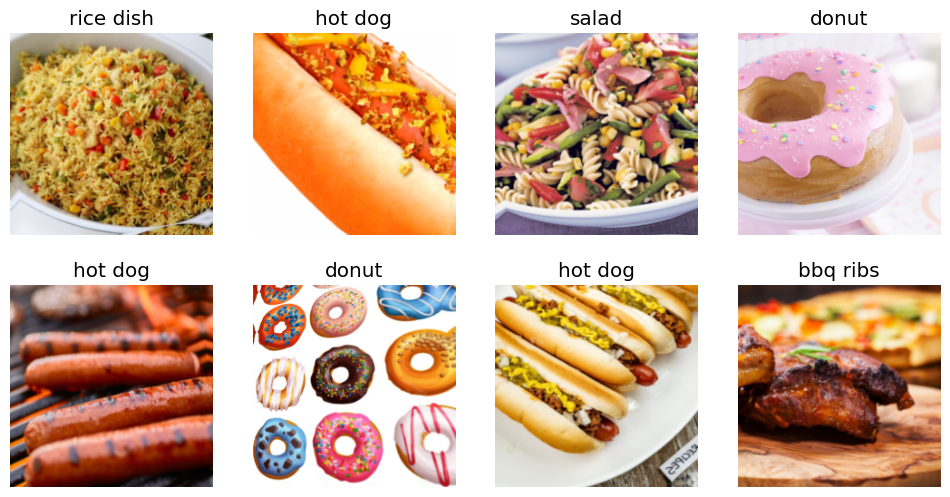

In [28]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [29]:
torch.save(dls, "food_dataloader_v0.pkl")